# Value Iteration
## Gambler's Problem

In [1]:
import numpy as np
from math import *
import matplotlib.pyplot as plt

In [2]:
# Declaring initial CONSTANTS
GOAL = 100
PH = 0.4
DISCOUNT = 1.0
GOAL_REACHED_REWARD = 1.0

In [3]:
# defining all of the states
states = np.arange(0, GOAL + 1, dtype=np.int32)

# defining actions for a given state
def actions(state):
    return np.arange(0, min(state, GOAL - state) + 1)

Expected return is the implementation of $q_\pi(s, a)$.<br>
Review:
$$
\begin{align}
    q_\pi(s, a) &= \mathbb{E}_\pi\big[r + \gamma v_\pi(s^\prime)\big]\\
    &= \sum_{a}\pi(a|s)\sum_{s^\prime, r} p(s^\prime, r | s, a) \big[r + \gamma v_\pi(s^\prime)\big]\\
    &= \sum_{s^\prime, r} p(s^\prime, r | s, a) \big[r + \gamma v_\pi(s^\prime)\big] & \text{Given we have deterministic actions}
\end{align}
$$

In [4]:
def expected_return(state, action, state_value):
    """
    args:
        state:        current state as a number of capitals
        action:       the amount to stack
        state_value:  state_value function that maps state to the return
    returns:
        returns:      the expected value to get if we take "action" and follow policy of state_value
    """
    returns = 0.0
    # if it is heads
    new_state = state + action
    reward = GOAL_REACHED_REWARD if new_state == GOAL else 0.0
    returns += PH * (reward + DISCOUNT * state_value[new_state])

    # if it is tails
    new_state = state - action
    reward = 0
    returns += (1 - PH) * (reward + DISCOUNT * state_value[new_state])

    return returns

One of the draw backs of policy iteration is that we need to do the policy-iteration step which it self needs to be done in the limit so to converge. However it is not needed; we can stop the policy-iteration after just one sweep (so each state is updated only once). This is called **value iteration**.
$$
\begin{align}
    v_{k+1}\  &\dot{=} \  \underset{a}{max} \ \mathbb{E}\big[R_{t+1} + \gamma v_k(S_{t+1}) | S_t=s, A_t=a\big]\\
    &= \underset{a}{max}\ \sum_{s^\prime, r} p(s^\prime, r | s, a)\bigg[r + \gamma v_k(s^\prime)\bigg]\\
    &= q_k(s, a) & \text{Given above formula}
\end{align}
$$
<br>
Above we have defined $q_k(s, a)$ as ```expected_return(state, action, state_value)```

In [5]:
def value_iteration(theta=1e-18, verbose=True):
    """
    args:
        theta:           the accuracy to estimate state_value
        verbose:         prints out progress
    returns:
        state_value:     estimated optimal state_value
        policy:          optimal policy given by state_value
        sweep_hist:      gives a list of state_values over each sweep
    """
    # initializes state_values
    state_value = np.zeros((GOAL + 1), dtype=np.float64)
    # initializes history
    sweep_hist = []
    while True:
        # save the old value to compare it with the new state_value
        old_state_value = state_value.copy()
        for state in states[1:GOAL]:
            # as the formula above states, we are choosing the maximum value given by an action to find optimal state_value
            state_value[state] = np.max([expected_return(state, action, state_value) for action in actions(state)])
        # calculates the difference between old state_value and the new one
        delta = np.abs(state_value - old_state_value).max()
        # store the new state_value as history
        sweep_hist.append(state_value.copy())
        # prints out progress
        if verbose:
            print(f'\rSweep {len(sweep_hist):<3}, delta is {delta:0.3e}', end='')
        # check if difference is smaller than theta
        if delta < theta:
            # initialize policy
            policy = np.zeros((GOAL + 1,),dtype=np.int32)
            # for each state find the optimal policy
            for state in states[1:GOAL]:
                action_returns = []
                for action in actions(state):
                    action_returns.append(expected_return(state, action, state_value))
                    # note that np.round is used to have policy the same as Figure 4.3 (Chapter4 Reinforcement learning)
                policy[state] = np.argmax(np.round(action_returns[1:], 5)) + 1
            return state_value, policy, sweep_hist

In [6]:
state_value, policy, sweep_history = value_iteration()

Sweep 32 , delta is 4.337e-19

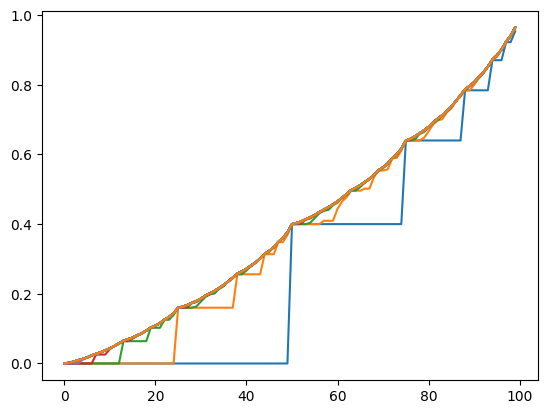

In [7]:
for i, hist in enumerate(sweep_history):
    plt.plot(range(hist.size - 1), hist[:-1], label=f'sweep{i}')

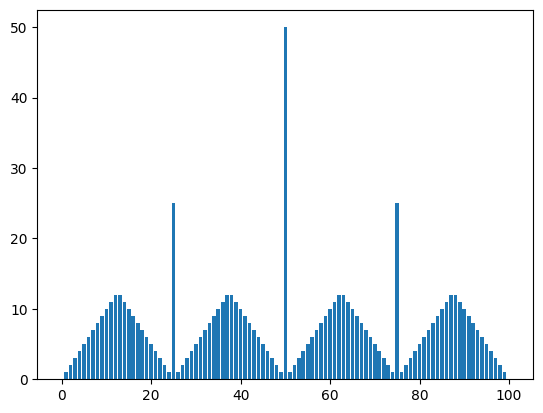

In [8]:
plt.bar(range(policy.size), policy);